# 0.0 Imports 

In [18]:
from sklearn import datasets as dt
from sklearn import tree as tr

from matplotlib import pyplot as plt

import cv2    # módulo da biblioteca opencv-python

# 1.0 Load dataset

In [2]:
# dataset que contém os dados para a classificação de iris, esse comando nos retorna um objeto
# similar a um dicionário, e nele está contido os dados, target, descrição etc...
iris = dt.load_iris()

In [3]:
# objeto similar a um dicionário
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
# informações armazenadas no objeto 'iris'
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# descrição do conjunto de dados 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# as classes na qual cada observação será classificada
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# targets transformados em valores númericos.
iris.target


# onde: 0 -> setosa
#       1 -> versicolor
#       2 -> virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# a classificação de cada observação é feita a partir de 4 features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

No nosso estudo vamos criar uma decision tree para tentar prever qual classe cada datapoint pertence com base em apenas duas feature: `petal lenght` e `petal width` (duas últimas colunas do dataset).

In [9]:
# separação dos dados
X = iris.data[:, 2:]
y = iris.target

# 2.0 Model Training

Todos os parâmetros da decision tree que possuem `min` no nome (`min_samples_leaf`, `min_samples_split`) seguram o crescimento quando **aumentamos** o seu valor.

O contrário também é verdadeiro para parâmetros com `max` (`max_depth`, `max_features`), ou seja, o crescimento da árvore é restrito se **diminuirmos** o seu valor.

In [28]:
# Principais parâmetros de uma decision tree:


# max_depth: controle do tamanho máximo de quebras da árvore. Ou seja, o tamanho máximo de crescimento
#            da árvore ou a quantidade de recortes.

# min_samples_leaf: O número mínimo de amostras que a folha seguinte deve ter após a divisão.

# min_samples_split: O número mínimo de amostra que a folha deve ter, antes de fazer um novo split.

# max_features: O número máximo de atributos avaliados para a divisão de cada nó.

# max_leaf_nodes: Número máximo de nós na árvore.

# min_impurity_decrease: Queda mínima de impureza necessária para ocorrer um novo split.


# define
model_tree = tr.DecisionTreeClassifier(

    max_depth=10,
    min_samples_split=30,

)

# training (fit)
model_tree.fit(X, y)

# predict

DecisionTreeClassifier(max_depth=10, min_samples_split=30)

In [32]:
# predict
model_tree.predict(X)   # retorna a classe que o modelo associou a cada observação.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
# predic_proba
model_tree.predict_proba(X)[::10]   # retorna a probalidade de cada ponto de pertencer a uma classe

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ]])

Por padrão o critério utilizado é o índice de Gini.

In [29]:
tr.export_graphviz(
    model_tree,                              # modelo treinado
    out_file='tree.dot',                     # nome do arquivo exportado
    feature_names=iris.feature_names[2:],    # nome das features
    class_names=iris.target_names,           # nome das classes
    rounded=True,                            # quando settamos para 'True' indicamos que queremos borda arredondada
    filled=True                              # pinta o quadrado referente ao nó para indicar a classe dominante
)

No jupyter notebook quando iniciamos um comando com sinal de exclamação '!' estamos dizendo para ele executar um comando no terminal.

```bash
dot -Tpng tree.dot -o tree.png
```

O comando `dot` é usado para converter arquivos '.dot' (DOT é um linguagem de descrição gráfica usada pela biblioteca Graphviz para descrever a eestrutura e layout de um gráfico). O argumento `Tpng` indica a extensão do arquivo de saída enquanto o argumento `-o` o nome do arquivo de saída.


Caso o comando não funcionar, devemos instalar a biblioteca Graph usando o seguinte script no terminal:
```bash
sudo apt install graphviz
```

In [30]:
# comando que converte o arquivo 'tree.dot' em um arquivo png chamado de 'tree.png'
!dot -Tpng tree.dot -o tree.png

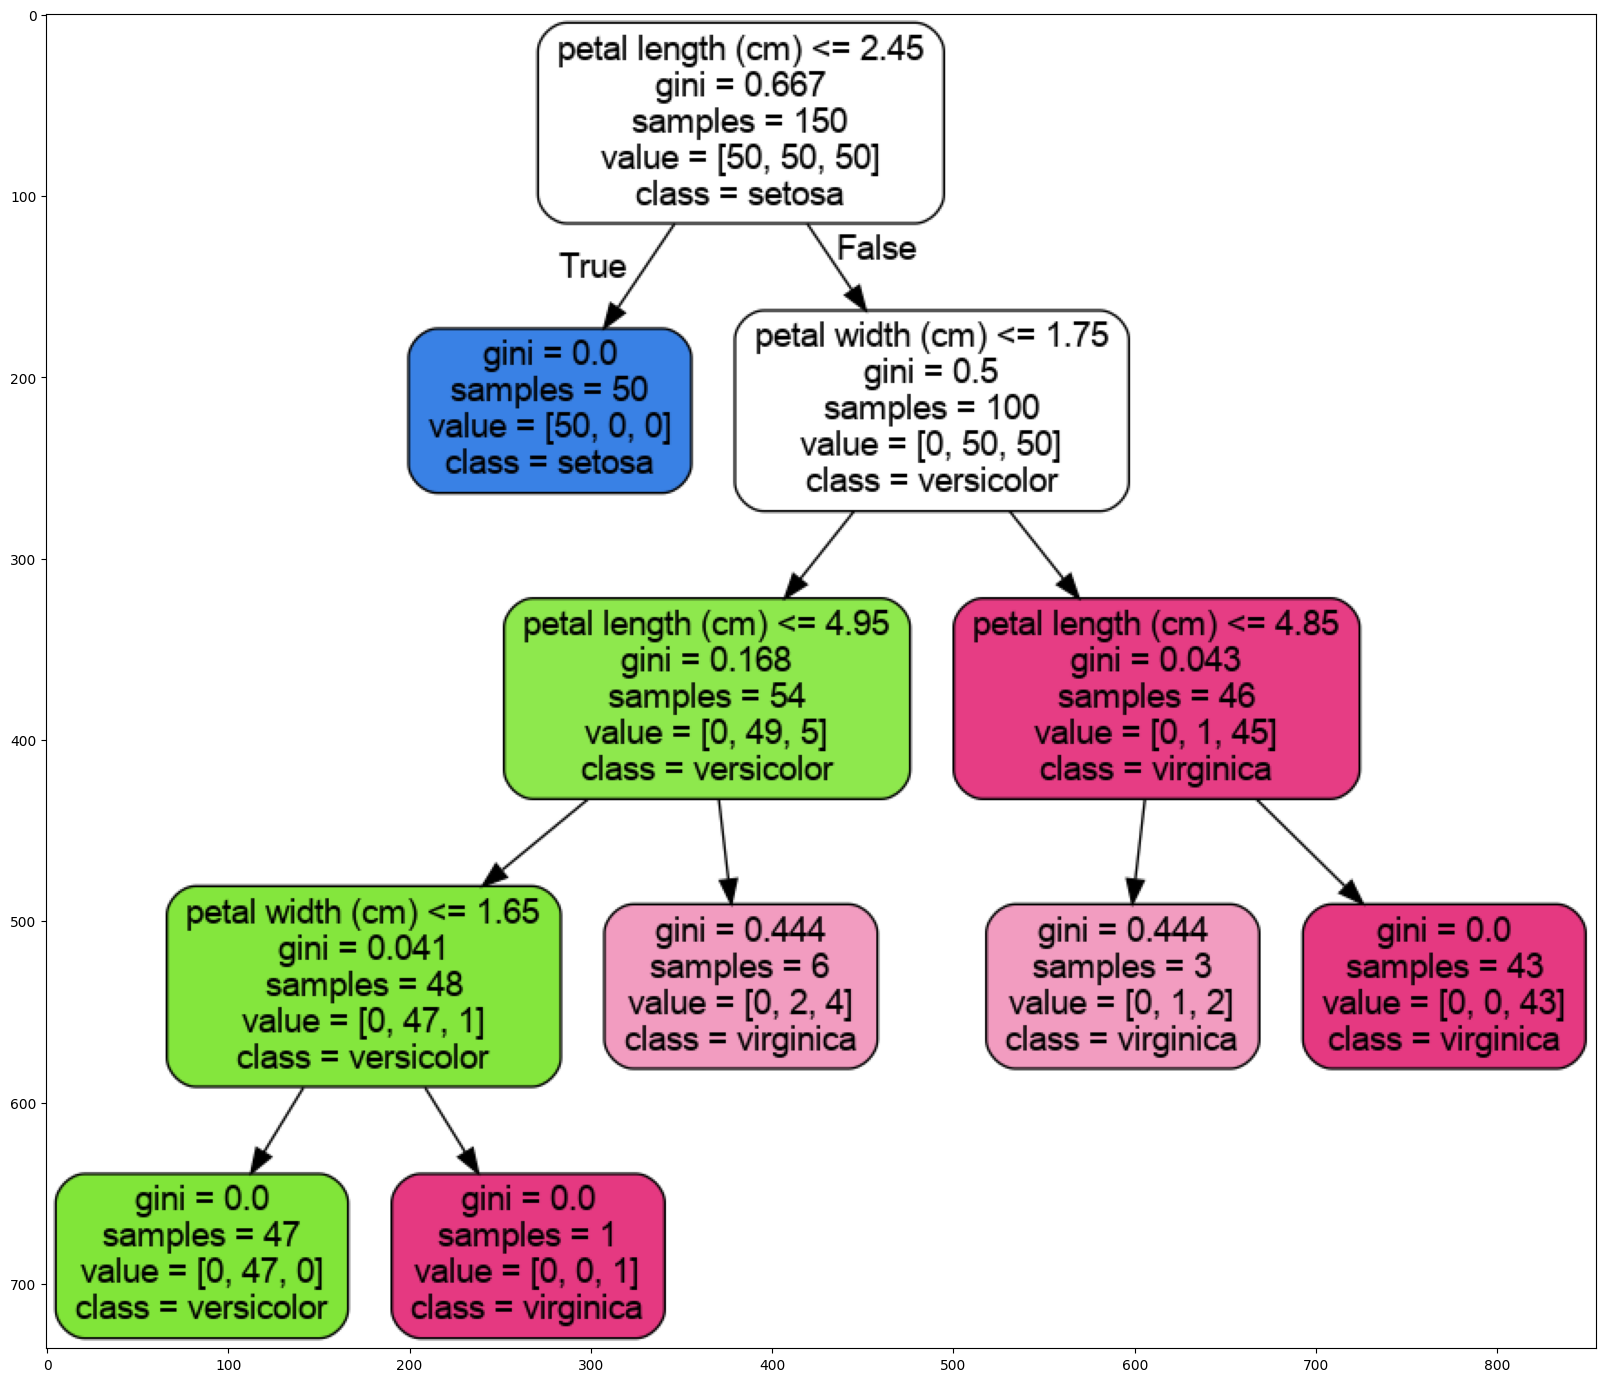

In [31]:
img = cv2.imread('tree.png')

plt.figure(figsize=(20, 20))
plt.imshow(img)